1. 2018-05-04 04:05:00: 上机处理齿轮箱出口压力高报警时发现油泵滤芯含有铁粉，经检查确认为齿轮箱二级小后轴承磨损，该机组在2017年4月22日因SKF轴承严重磨损已更换过齿轮箱，并要求新齿轮箱使用FAG轴承。截止5月4日现场已巡检齿轮箱67台，合计发现5台SKF轴承，因现场39台机组处于500h试运行考核期，现场计划在试运行结束后处理，目前临时措施更换油泵滤芯。
1. 2018-05-04 09:05:00: 查阅监控数据，发现故障发生时，齿轮箱入口油压力未0.3bar，出口油压力为14.8bar,上机组检查，上机组检查，滤芯含有大量杂质及少量铁粉，检查齿轮箱发现齿轮箱二级小后轴承磨损。更换滤芯后故障消除。
1. 2018-05-13 05:05:00: 机组报机舱加速度极限故障停机，上机组对加速度传感器及线路检查，无异常;检查齿轮箱,发现齿轮箱二级小后轴承轴承保持架损坏;检查齿轮箱弹性支撑，发现左右个一个弹性支承脚垫出现裂纹损坏。重齿厂家给出方案，先更换二级小后轴承，如不能更换，再进行下塔处理。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
reload(model_entry)

<module 'model_entry' from '../..\\model_entry.py'>

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_farm = "san tang hu"
wind_turbine = "33"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (114, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

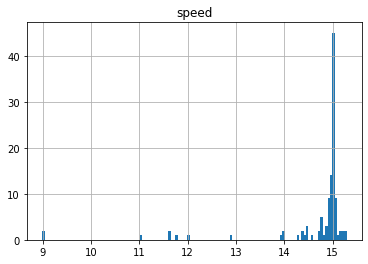

In [5]:
speed.hist(bins=128)

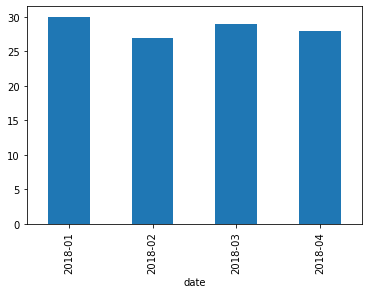

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [20]:
feature

gearbox                                                    \
                      mean        sd      root       rms      peak  skewness   
date                                                                           
2018-01-01 12:00  0.000345  0.196295  0.132854  0.196295  0.829315 -0.125264   
2018-01-02 00:00 -0.000385  0.192181  0.129160  0.192180  0.820433 -0.052635   
2018-01-03 06:00 -0.000013  0.199321  0.134179  0.199320  0.851180 -0.065471   
2018-01-04 06:00  0.000238  0.211276  0.142116  0.211276  1.060089 -0.004941   
2018-01-05 00:00 -0.000325  0.145806  0.097861  0.145806  0.579767 -0.066413   
...                    ...       ...       ...       ...       ...       ...   
2018-04-26 12:00  0.000096  0.377391  0.247135  0.377390  2.182196 -0.053536   
2018-04-27 06:00  0.000144  0.376464  0.248955  0.376463  1.877114 -0.053312   
2018-04-28 06:00  0.000012  0.414200  0.271500  0.414199  2.448063 -0.053965   
2018-04-29 06:00 -0.000442  0.510489  0.329542  0.510487  2.743698 -0.054058   
2018-04-30 00:00  0.000011  0.733306  0.448002  0.733304  4.234871 -0.044278   

                                                          ...  \
                  kurtosis     crest clearance     shape  ...   
date                                                      ...   
2018-01-01 12:00 -0.086366  4.224839  6.242296  1.251329  ...   
2018-01-02 00:00  0.013888  4.269077  6.352056  1.257416  ...   
2018-01-03 06:00 -0.009359  4.270417  6.343598  1.256139  ...   
2018-01-04 06:00  0.045192  5.017560  7.459318  1.257179  ...   
2018-01-05 00:00 -0.023036  3.976286  5.924385  1.257930  ...   
...                    ...       ...       ...       ...  ...   
2018-04-26 12:00  0.536207  5.782331  8.829970  1.280333  ...   
2018-04-27 06:00  0.333436  4.986184  7.539980  1.271412  ...   
2018-04-28 06:00  0.560676  5.910354  9.016820  1.279466  ...   
2018-04-29 06:00  0.735502  5.374663  8.325799  1.292409  ...   
2018-04-30 00:00  1.365068  5.775058  9.452802  1.337203  ...   

                 high_speed_shaft                                        \
                               p5          p6           p7           p8   
date                                                                      
2018-01-01 12:00      3357.144711   67.086833  4507.186537  8007.313195   
2018-01-02 00:00      3593.290062   68.404556  4746.705572  8101.441316   
2018-01-03 06:00      3686.733037   68.441907  4830.233576  8124.490265   
2018-01-04 06:00      3209.076139   73.659389  4369.359884  8115.106248   
2018-01-05 00:00      3518.086753   54.896211  4640.569237  7918.327209   
...                           ...         ...          ...          ...   
2018-04-26 12:00      3644.811187  132.150304  4551.760859  7260.822937   
2018-04-27 06:00      3792.631946  135.248245  4721.145019  7393.560297   
2018-04-28 06:00      3916.184802  146.814677  4799.468201  7291.065017   
2018-04-29 06:00      4092.565587  171.041055  4941.947676  7309.915639   
2018-04-30 00:00      3802.367490  167.987033  4592.569433  6953.618630   

                                                                        \
                        p9       p10        p11          p12       p13   
date                                                                     
2018-01-01 12:00  0.562884  0.019983  42.860621  5273.961914  0.002913   
2018-01-02 00:00  0.585909  0.019037  37.124914  4793.066167  0.002897   
2018-01-03 06:00  0.594528  0.018564  35.261162  4700.173442  0.002880   
2018-01-04 06:00  0.538423  0.022953  45.110269  4880.361489  0.003347   
2018-01-05 00:00  0.586054  0.015604  45.101652  7170.094226  0.002154   
...                    ...       ...        ...          ...       ...   
2018-04-26 12:00  0.626893  0.036257  13.091749  1045.609981  0.009257   
2018-04-27 06:00  0.638548  0.035661  11.634178   972.192903  0.009261   
2018-04-28 06:00  0.658267  0.037489   8.633877   771.734520  0.010649   
2018-04-29 06:00  0.676061  0.041793   5.988347 

In [7]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-03"

test_start = "2018-04"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (86, 75)
feature_test.shape: (28, 75)


In [8]:
feature_test = feature["2018-03": ]
# feature_test = feature
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

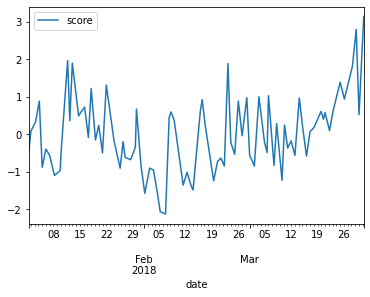

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

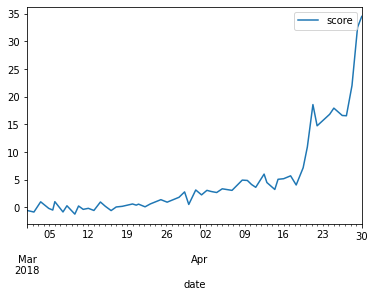

In [13]:
anomaly_scores.plot()

In [14]:
anomaly_scores_train = detector.decision_scores
label_train = detector.label
# 测试
anomaly_scores_test = detector.decision_function(feature_test)
label_test = detector.predict(feature_test)

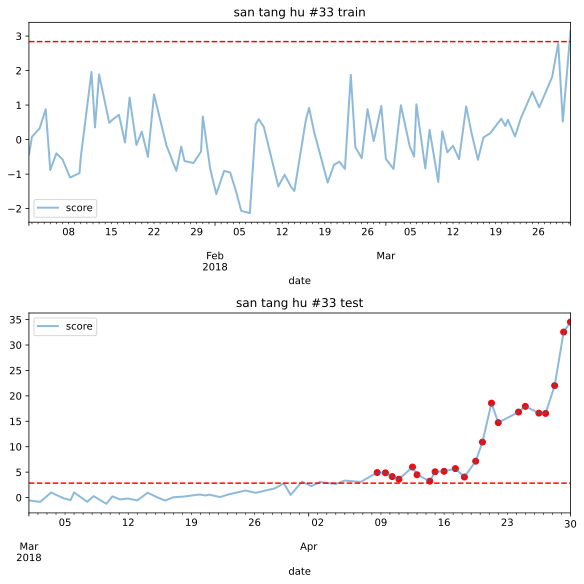

In [15]:
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, wind_farm, 
    wind_turbine)

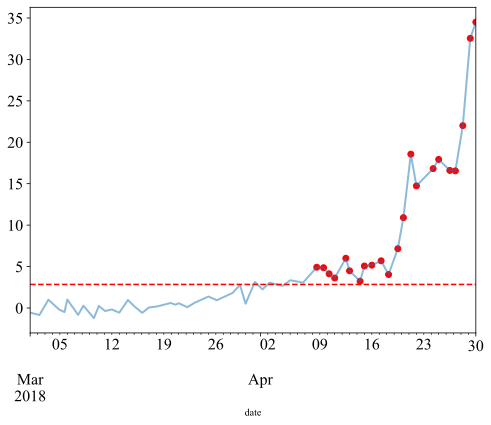

In [18]:
# config = {
#     "font.family":'Times New Roman',
# #     "font.family": "serif",
# #     "font.size": 20,
#     "mathtext.fontset":'stix',
#     "font.serif": ['SimSun'],
# }
config = {
    "font.family":'Times New Roman',  # 设置字体类型
}
rcParams.update(config)

visualization.set_figsize(figsize=(8, 6))
fig, ax = plt.subplots()
anomaly_scores_test.plot(ax=ax, linewidth=2, alpha=0.5, legend=False, fontsize=16)
ax.plot(anomaly_scores_test.index, [detector.threshold] * len(anomaly_scores_test), "r--", label="threshold")
ax.scatter(x=anomaly_scores_test[label_test.label].index, y=anomaly_scores_test[label_test.label], c="r")


# ax.set_xlabel("日期")
# ax.tick_params(labelsize=16)

In [19]:
label_test

,label
date,
2018-03-01 00:00,False
2018-03-02 06:00,False
2018-03-03 11:00,False
2018-03-04 22:00,False
2018-03-05 15:00,False
2018-03-06 00:00,False
2018-03-07 11:00,False
2018-03-08 04:00,False
2018-03-09 14:00,False


In [21]:
feature_test

gearbox                                                    \
                      mean        sd      root       rms      peak  skewness   
date                                                                           
2018-03-01 00:00 -0.000217  0.186637  0.126211  0.186637  0.818614 -0.019033   
2018-03-02 06:00  0.000064  0.147313  0.099854  0.147313  0.622524  0.015920   
2018-03-03 11:00 -0.000348  0.236008  0.160023  0.236007  0.986361  0.154691   
2018-03-04 22:00  0.000023  0.033199  0.022261  0.033199  0.157143  0.002188   
2018-03-05 15:00 -0.000094  0.152407  0.102969  0.152406  0.654684 -0.035188   
2018-03-06 00:00 -0.000387  0.221137  0.150154  0.221137  0.922400  0.016159   
2018-03-07 11:00 -0.000213  0.157353  0.106859  0.157353  0.654364 -0.161268   
2018-03-08 04:00  0.000111  0.211024  0.141975  0.211023  0.930797 -0.107909   
2018-03-09 14:00 -0.000179  0.077630  0.052156  0.077630  0.376468  0.051920   
2018-03-10 06:00 -0.000064  0.194070  0.130607  0.194070  0.859540 -0.010381   
2018-03-11 02:00 -0.000151  0.161682  0.109641  0.161682  0.694548 -0.152454   
2018-03-12 00:00  0.000299  0.212347  0.142263  0.212347  0.881040 -0.131059   
2018-03-13 00:00 -0.000073  0.153117  0.103015  0.153117  0.745878 -0.009888   
2018-03-14 04:00  0.000012  0.166983  0.112026  0.166983  0.916822  0.064640   
2018-03-15 01:00  0.000189  0.155396  0.104849  0.155395  0.699061 -0.001976   
2018-03-16 02:00 -0.000204  0.159154  0.107849  0.159154  0.695982 -0.101735   
2018-03-17 00:00 -0.000209  0.159972  0.108105  0.159971  0.771425  0.017882   
2018-03-18 02:00  0.000067  0.164987  0.111432  0.164986  0.784676  0.006111   
2018-03-19 22:00 -0.000029  0.166622  0.112628  0.166621  0.861031 -0.076052   
2018-03-20 14:00 -0.000236  0.228678  0.153678  0.228678  0.970075 -0.105411   
2018-03-21 00:00 -0.000163  0.209523  0.141093  0.209522  0.909948 -0.032009   
2018-03-22 04:00  0.000066  0.170940  0.114686  0.170940  0.796747  0.055806   
2018-03-23 03:00 -0.000082  0.172198  0.115737  0.172197  0.823426  0.034433   
2018-03-25 00:00  0.000042  0.240208  0.161297  0.240207  1.049018 -0.130981   
2018-03-26 03:00 -0.000089  0.166227  0.111330  0.166226  0.890140  0.050863   
2018-03-28 06:00  0.000223  0.241256  0.162407  0.241255  1.051598 -0.134311   
2018-03-29 06:00 -0.000449  0.248617  0.166256  0.248617  1.266514 -0.030258   
2018-03-30 00:00  0.000063  0.163624  0.109585  0.163623  0.767052  0.030459   
2018-03-31 06:00 -0.000286  0.271228  0.182708  0.271227  1.237629  0.025479   
2018-04-01 07:00 -0.000133  0.237155  0.159859  0.237155  1.116225 -0.074453   
2018-04-02 06:00  0.000212  0.256746  0.173590  0.256745  1.160884  0.024134   
2018-04-03 00:00  0.000160  0.251459  0.169995  0.251459  1.124139 -0.099639   
2018-04-04 00:00 -0.000280  0.260777  0.175173  0.260776  1.192420 -0.078152   
2018-04-05 00:00  0.000329  0.265496  0.178802  0.265495  1.258170 -0.055919   
2018-04-06 18:00 -0.000052  0.274569  0.184382  0.274568  1.312804 -0.041206   
2018-04-08 14:00  0.000456  0.289959  0.194169  0.289958  1.462473  0.020082   
2018-04-09 12:00 -0.000154  0.302429  0.201648  0.302429  1.536334  0.055342   
2018-04-10 06:00  0.000113  0.274189  0.184918  0.274188  1.333550 -0.039593   
2018-04-11 00:00 -0.000021  0.285347  0.191952  0.285346  1.363553 -0.041155   
2018-04-12 12:00 -0.000358  0.310087  0.207668  0.310087  1.395757  0.018493   
2018-04-13 00:00 -0.000020  0.286525  0.191454  0.286525  1.461994 -0.083846   
2018-04-14 10:00 -0.000196  0.257148  0.170429  0.257148  1.285414  0.005406   
2018-04-15 00:00 -0.000042  0.308067  0.206643  0.308066  1.423315  0.001439   
2018-04-16 00:00  0.000054  0.312542  0.209205  0.312541  1.394292 -0.048532   
2018-04-17 06:00  0.000105  0.317243  0.212250  0.317242  1.456456 -0.003335   
2018-04-18 06:00 -0.000047  0.288790  0.191778  0.288789  1.529808 -0.024888   
2018-04-19 12:00 -0.000072  0.338197  0.226371  0.338196  1.510586  0.004757   
2018-04-20 06:00 -0